In [30]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
from scipy.spatial import distance_matrix
from scipy.spatial.distance import cdist
import math
import random
import copy
import matplotlib.pyplot as plt
dz=pd.read_excel('Accumulated Data 2010 - original ready for trng & valdtn cases - forANN.xlsx')
data=dz.drop([11800,11801,11802,11803,11804])
#data.columns=['x','y']
Z=np.array(data.drop(columns=['If Breakout Case']))


In [31]:
def distance(v,Z):
    N = len(Z)
    n = len(Z[0])
    c = len(v)
    D = np.zeros((N,c))
    
    for i in range(0,N):
        for j in range(0,c):
            temp1 = np.subtract(Z[i],v[j])
            
            temp2 = np.transpose(temp1)
            temp3 = np.matmul(temp2,temp1)
            
            
            D[i][j] = math.sqrt(temp3)
    
    return D

In [32]:
def k_means(X,K):
    nrow=X.shape[0]
    ncol=X.shape[1]
    
    initial_centroids= np.random.choice(nrow,K,replace=False)
    
    centroids=X[initial_centroids]
    centroids_old=np.zeros((K,ncol))
    
    cluster_assignments=np.zeros(nrow)
    
    while(centroids_old!=centroids).any():
        centroids_old=centroids.copy()
        
        dist_matrix=distance_matrix(X,centroids,p=2)
        
        for i in np.arange(nrow):
            d=dist_matrix[i]
            closest_centroid = (np.where(d==np.min(d)))[0][0]
           
            cluster_assignments[i]=closest_centroid
        
        for k in np.arange(K):
            Xk=X[cluster_assignments==k]
            centroids[k] = np.apply_along_axis(np.mean,axis=0,arr=Xk)
          
    return (centroids,cluster_assignments)

In [36]:
krange=range(1,10)
dist=[]
ratio=[]
for i in range(1,10):

    k_means_result=k_means(Z,i)

    centroids=k_means_result[0]

    dist.append(sum(np.min(cdist(Z,centroids,'euclidean'),axis=1))/Z.shape[0])
    

for i in range(1,10):
    if(i!=1 and i!=10):
        print((dist[i]-dist[i+1])/(dist[i-1]-dist[i]),i)



0.6510122621436635 2
0.4440090216821133 3
1.0107039176666255 4
0.5106799848271185 5
0.8552744961925951 6
0.49787673418665435 7


IndexError: list index out of range

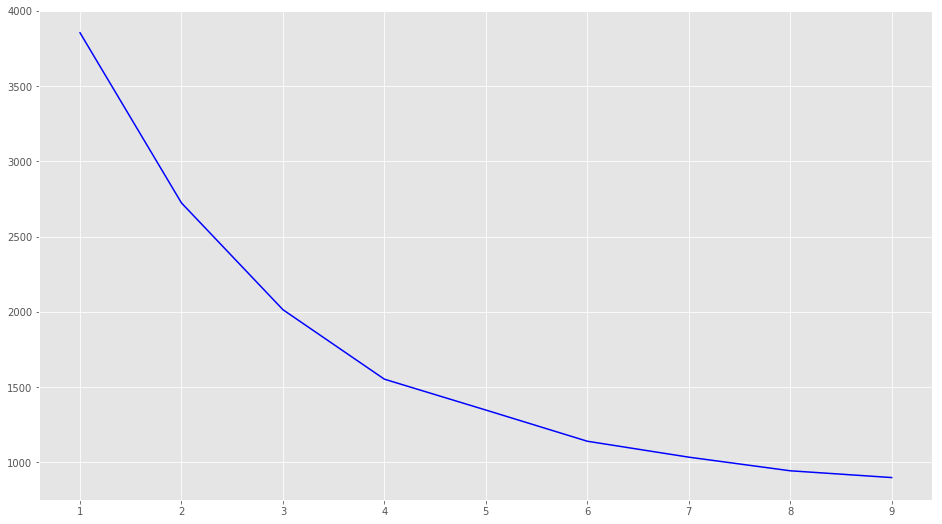

In [37]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.plot(krange,dist,'b')

In [68]:
assignment=k_means(Z,4)[1]

In [69]:
mem=np.zeros((Z.shape[0],4))

In [70]:
for i in range(len(assignment)):
    for j in range(4):
        if(assignment[i]==j):
            mem[i][j]=1
        else:
            mem[i][j]=0


In [71]:
mem

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [72]:
df_no=pd.DataFrame(mem)
with pd.ExcelWriter('cluster_assing_km.xlsx') as writer:
    df_no.to_excel(writer,sheet_name='K_norm')